In [1]:
from matplotlib import pyplot as plt
from sklearn import metrics
from sklearn.metrics import precision_recall_fscore_support

In [2]:
def ROC(model,X_test,y_test):
    metrics.plot_roc_curve(model,X_test,y_test)

In [3]:
def PRINT_METRICS(model_name,y,y_pred,accuracies,index):
    l = []
    t = precision_recall_fscore_support(y,y_pred,average='macro')
    l.append(t[0])
    l.append(t[1])
    l.append(t[2])
    l.append(accuracies[index])
    print(model_name)
    print('Precision:'+str(l[0])+'|Recall:'+str(l[1])+'|F1_measure:'+str(l[2])+'|accuracy:'+str(l[3]))

In [4]:
def FileToList(filename):
    l = []
    f = open(filename)
    for line in f:
        l.append(line)
    f.close()
    return l

In [5]:
def THREE_SEQUENCE(l):
    three_words = []
    queue_three = []
    queue_three.append(l[0])
    queue_three.append(l[1])
    i = 2
    n = len(l)
    while i<n:
        var1 = queue_three[0]
        queue_three.pop(0)
        var2 = queue_three[0]
        three_words.append(var1+'-'+var2+'-'+l[i])
        queue_three.append(l[i])
        i+=1
    return three_words

In [6]:
def FileToThreeSequenceList(filename):
    l1 = []
    f = open(filename)
    for line in f:
        l1.append(line)
    f.close()
    n = len(l1)
    l = []
    i = 0
    while i<n/256:
        l.append(l1[i])
        i+=1
    n = len(l)
    if n<3:
        return []
    else:
        return THREE_SEQUENCE(l)

In [7]:
import glob

In [8]:
list_of_filesB = glob.glob("Dataset-20201023T162720Z-001/Dataset/B/sys/*.txt")
list_of_filesM = glob.glob("Dataset-20201023T162720Z-001/Dataset/M/sys/*.txt")

In [9]:
l = []
wordSet = set([])
for filename in list_of_filesB:
    l = FileToThreeSequenceList(filename)
    wordSet = wordSet.union(set(l))
l = []
for filename in list_of_filesM:
    l = FileToThreeSequenceList(filename)
    wordSet = wordSet.union(set(l))

In [10]:
l = []
output = []
for filename in list_of_filesB:
    wordDict = dict.fromkeys(wordSet,0)
    l1 = FileToThreeSequenceList(filename)
    for word in l1:
        wordDict[word] = 1
    l.append(wordDict)
    output.append(0)
for filename in list_of_filesM:
    wordDict = dict.fromkeys(wordSet,0)
    l1 = FileToThreeSequenceList(filename)
    for word in l1:
        wordDict[word] = 1
    l.append(wordDict)
    output.append(1)

In [11]:
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [12]:
df = pd.DataFrame(l)

In [13]:
df['output'] = output

In [14]:
X = pd.DataFrame()
y = pd.DataFrame()

In [15]:
X = df.drop(['output'],axis='columns')
y = df.output

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [17]:
len(X_train),len(X_test),len(y_train),len(y_test)

(4076, 1747, 4076, 1747)

In [18]:
model_LR = LogisticRegression()
model_SVMLinear = SVC(kernel='linear')
model_SVMRBF = SVC(kernel='rbf')

In [19]:
model_LR.fit(X_train,y_train)

LogisticRegression()

In [20]:
accuracies = []

In [21]:
accuracies.append(model_LR.score(X_test,y_test))

In [22]:
model_SVMLinear.fit(X_train,y_train)

SVC(kernel='linear')

In [23]:
accuracies.append(model_SVMLinear.score(X_test,y_test))

In [24]:
model_SVMRBF.fit(X_train,y_train)

SVC()

In [25]:
accuracies.append(model_SVMRBF.score(X_test,y_test))

In [26]:
y = []
for val in y_test:
    y.append(val)

In [27]:
y_predLR = model_LR.predict(X_test)
y_predSVML = model_SVMLinear.predict(X_test)
y_predSVMRBF = model_SVMRBF.predict(X_test)

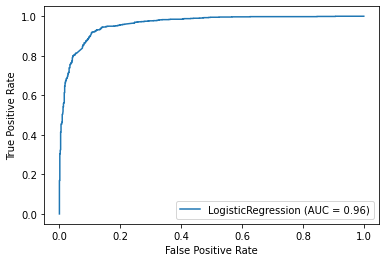

In [28]:
ROC(model_LR,X_test,y_test)

In [29]:
PRINT_METRICS('MODEL:LOGISTICS_REGRESSION',y,y_predLR,accuracies,0)

MODEL:LOGISTICS_REGRESSION
Precision:0.9089914248272187|Recall:0.9018300517415008|F1_measure:0.9047342385040447|accuracy:0.9072696050372067


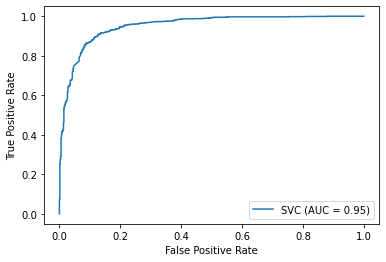

In [30]:
ROC(model_SVMLinear,X_test,y_test)

In [31]:
PRINT_METRICS('MODEL:SVM_LINEAR',y,y_predSVML,accuracies,1)

MODEL:SVM_LINEAR
Precision:0.8890986578427197|Recall:0.8806953715798387|F1_measure:0.883948565757781|accuracy:0.8872352604464797


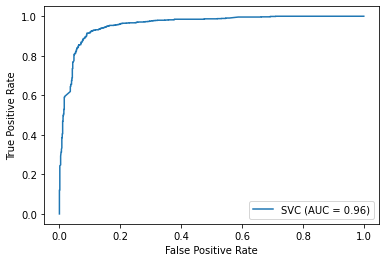

In [32]:
ROC(model_SVMRBF,X_test,y_test)

In [33]:
PRINT_METRICS('MODEL:SVM_RBF',y,y_predLR,accuracies,2)

MODEL:SVM_RBF
Precision:0.9089914248272187|Recall:0.9018300517415008|F1_measure:0.9047342385040447|accuracy:0.9066971951917573
